## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Vizualize the data

In [2]:
data_origin = pd.read_csv('Data/BonBanh.csv')
data_origin

,Tên xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Màu ngoại thất,Màu nội thất,Dẫn động,Số chỗ ngồi,Giá xe
0,Xe Peugeot 2008 Active 1.2 AT,2022,Xe đã dùng,"30,000 Km",Lắp ráp trong nước,Crossover,Số tự động,Xăng 1.2 L,Đỏ,Đen,FWD - Dẫn động cầu trước,5 chỗ,679 Triệu
1,Xe Mercedes Benz C class C300 AMG,2014,Xe đã dùng,"90,000 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 3.0 L,Trắng,Đen,RFD - Dẫn động cầu sau,5 chỗ,499 Triệu
2,Xe Mercedes Benz E class E200 Exclusive,2022,Xe đã dùng,500 Km,Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Đen,Nâu,RFD - Dẫn động cầu sau,5 chỗ,2 Tỷ 229 Triệu
3,Xe Mercedes Benz C class C200 Avantgarde,2021,Xe đã dùng,80 Km,Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Xanh,Nâu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 399 Triệu
4,Xe Mercedes Benz E class E200 Exclusive,2022,Xe đã dùng,"8,888 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Trắng,Nâu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 788 Triệu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,Xe Kia Morning LX 1.0 AT,2009,Xe đã dùng,"1,111 Km",Nhập khẩu,Hatchback,Số tự động,Xăng 1.0 L,Bạc,Kem,FWD - Dẫn động cầu trước,5 chỗ,158 Triệu
18359,Xe Hyundai Accent 1.4 MT,2018,Xe đã dùng,"80,000 Km",Lắp ráp trong nước,Sedan,Số tay,Xăng 1.4 L,Trắng,Kem,FWD - Dẫn động cầu trước,5 chỗ,328 Triệu
18360,Xe Toyota Vios G 1.5 CVT,2023,Xe mới,Xe mới,Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Trắng,Đen,FWD - Dẫn động cầu trước,5 chỗ,592 Triệu
18361,Xe Mitsubishi Attrage 1.2 CVT,2023,Xe mới,Xe mới,Nhập khẩu,Sedan,Số tự động,Xăng 1.2 L,Xám,Đen,FWD - Dẫn động cầu trước,5 chỗ,465 Triệu


## Preprocessing

#### Change value *Xe mới* in into *0 km* and remove *km* in other values in **Số km đã đi** column

In [3]:
data_origin['Số km đã đi'] = data_origin['Số km đã đi'].replace('Xe mới', '0 Km')
data_origin['Số km đã đi'] = data_origin['Số km đã đi'].str.replace('Km', '')

#### Split **Tên xe** column into **Hãng xe** column and **Dòng xe** column

In [4]:
data_origin['Tên xe'] = data_origin['Tên xe'].str.replace('Xe ', '')
check =  lambda x : ' '.join(x.split()[:1]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[:2])
cartype = data_origin['Tên xe'].apply(check)
data_origin['Hãng xe'] = cartype

In [5]:
#remove 2 first words from Tên xe column if the first word is not Merceides else take 1 word
data_origin['Tên xe'] = data_origin['Tên xe'].apply(lambda x : ' '.join(x.split()[1:]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[2:]))

In [6]:
classcheck = lambda x: ' ' if x == '' else (' '.join(x.split()[:2]) if (x.split()[0] == "4" or x.split()[0]=="Range Rover" or x.split()[0]=="Lux" or x.split()[0]== "Range" ) else ' '.join(x.split()[:1]))
series = data_origin['Tên xe'].apply(classcheck)
data_origin['Series'] = series

In [7]:
data_origin = data_origin.drop('Tên xe', axis=1)

#### Split **Động cơ** column into **Dung tích** column and **Loại nhiên liệu** column

In [8]:
data_origin['Dung tich'] = data_origin['Động cơ'].str.extract(r'(\d\.\d)')
data_origin['Loại nhiên liệu'] = data_origin['Động cơ'].str.extract(r'(Xăng|Dầu|Hybrid|Điện)')

In [9]:
data_origin['Dung tich'] = data_origin['Dung tich'].fillna(0)
data_origin = data_origin.drop('Động cơ', axis=1)

#### Remove *Chỗ* in all values in **Số chỗ ngồi** column

In [10]:
#remove "cho" from So cho ngoi column
data_origin['Số chỗ ngồi'] = data_origin['Số chỗ ngồi'].str.replace('chỗ', '')

#### Take the first word in all value **Dẫn động**

In [11]:
data_origin['Dẫn động'] = data_origin['Dẫn động'].apply(lambda x: x.split()[0])

#### Change value in **Giá xe** column into *Triệu* unit

In [12]:
def convert_price(price):
    price = price.split(" ")[:-1]
    if len(price) == 3:
        return int(price[0])*1000 + int(price[2])
    return int(price[0])
data_origin['Giá xe'] = data_origin['Giá xe'].apply(convert_price)

## Exploratory and data analynist

C:\Users\Admin\AppData\Local\Temp\ipykernel_4676\1309950190.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_origin['Giá xe'], bins=200)


<Axes: title={'center': 'Car price distribution'}, xlabel='Giá xe', ylabel='Density'>

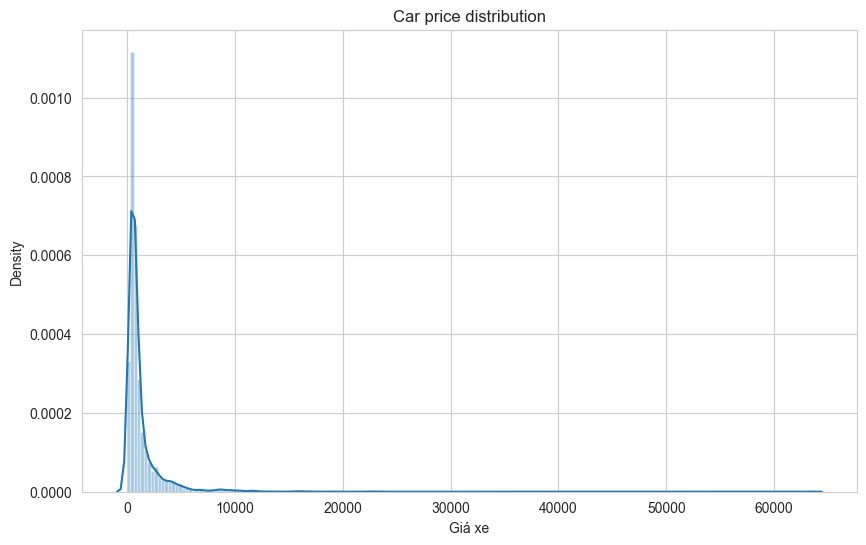

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Car price distribution')
sns.distplot(data_origin['Giá xe'], bins=200)